Source: https://product-data-science.datamasked.com/courses/496549/lectures/9194598

## Goal

E-commerce websites often transact huge amounts of money. And whenever a huge amount of money is moved, there is a high risk of users performing fraudulent activities, e.g. using stolen credit cards or doing money laundry.

Machine Learning really excels at identifying fraudulent activities. Any website where you put your credit card information has a risk team in charge of avoiding frauds via machine learning.

The goal of this challenge is to build a machine learning model that predicts the probability that the first transaction of a new user is fraudulent.

## Challenge Description

Company XYZ is an e-commerce site that sells hand-made clothes.


You have to build a model that predicts whether a user has a high probability of using the site to perform some illegal activity or not. This is a super common task for data scientists.


You only have information about the user first transaction on the site and based on that you have to make your classification (“fraud/no fraud”).


These are the tasks you are asked to do:


1. For each user, determine their country based on the IP address


2. Build a model to predict whether an activity is fraudulent or not. Explain how different assumptions about the cost of false positives vs false negatives would impact the model


3. Your boss is a bit worried about using a model she doesn’t understand for something as important as fraud detection. How would you explain her how the model is making the predictions? Not from a mathematical perspective (she couldn’t care less about that), but from a user perspective. What kinds of users are more likely to be classified as at risk? What are their characteristics?


4. Let’s say you now have this model which can be used live to predict in real time if an activity is fraudulent or not. From a product perspective, how would you use it? That is, what kind of different user experiences would you build based on the model output?

## Data

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 350)

data = pd.read_csv("https://drive.google.com/uc?export=download&id=18RLruiMU8rM-IQPLdwL6wNEc8Kks2JZQ")

# fix ip address
# data['ip_address']  = data['ip_address'].astype(int)
data['ip_address'] = round(data['ip_address']).astype(int)
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758369,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311388,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542444,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154527,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470524,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708,0


user_id : Id of the user. Unique by user

signup_time : the time when the user created her account (GMT time)

purchase_time : the time when the user bought the item (GMT time)

purchase_value : the cost of the item purchased (USD)

device_id : the device id. You can assume that it is unique by device. I.e., same device ID means that the same physical device was used for the transaction

source : user marketing channel: ads, SEO, Direct (i.e. came to the site by directly typing the site address on the browser)

browser : the browser used by the user

sex : user sex: Male/Female

age : user age

ip_address : user numeric ip address

class : this is what we are trying to predict: whether the activity was fraudulent (1) or not (0)

In [2]:
ips = pd.read_csv("https://drive.google.com/uc?export=download&id=1wbKys6YI-IvE-b-C0_4xR4zz2YnpOL1d")
ips['lower_bound_ip_address'] = round(ips['lower_bound_ip_address']).astype(int)
ips

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China
...,...,...,...
138841,3758092288,3758093311,Hong Kong
138842,3758093312,3758094335,India
138843,3758095360,3758095871,China
138844,3758095872,3758096127,Singapore


### Question 1

Determine the country for each user based on ip address

In [3]:
data_country = [None] * data.shape[0]

In [4]:
for i in range(data.shape[0]):
    tmp = ips[(data['ip_address'][i] >= ips['lower_bound_ip_address']) 
              & (data['ip_address'][i] <= ips['upper_bound_ip_address'])]['country'].values
    
    if len(tmp) == 1:
        data_country[i] = tmp[0]

In [5]:
data['country'] = data_country
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758369,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311388,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542444,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154527,1,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221,0,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470524,0,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708,0,United States


### Question 2

build a model to predict fraudulent

### feature extracting

In [6]:
from datetime import datetime
# timedifference btw sign-up and purchase
data['signup_time'] = pd.to_datetime(data['signup_time'])
data['purchase_time'] = pd.to_datetime(data['purchase_time'])
data['signup_purchase_diff'] = (data['purchase_time'] - data['signup_time']).dt.total_seconds()

# check for each device_id, how many difference users have it
data['num_of_users_sharing_this_device_id'] = data.groupby(['device_id'])['user_id'].transform('count')
data['num_of_users_sharing_this_ip'] = data.groupby(['ip_address'])['user_id'].transform('count')

data.head()
# note
# --------
# While aggregation must return a reduced version of the data, 
# transformation can return some transformed version of the full data to recombine. 
# For such a transformation, the output is the same shape as the input. 
# A common example is to center the data by subtracting the group-wise mean.
# --------


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,signup_purchase_diff,num_of_users_sharing_this_device_id,num_of_users_sharing_this_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758369,0,Japan,4506682.0,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311388,0,United States,17944.0,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,United States,1.0,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542444,0,None,492085.0,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,4361461.0,1,1


In [7]:
# drop some useless cols
df = data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address'], axis=1)

# replace None in country by 'Not_found'
df['country'].replace([None], 'Not_found', inplace=True)
df['country'].nunique() # 182 unique countries
df.groupby('country')['country'].size().nlargest(10)

country
United States        58049
Not_found            21966
China                12038
Japan                 7306
United Kingdom        4490
Korea Republic of     4162
Germany               3646
France                3161
Canada                2975
Brazil                2961
Name: country, dtype: int64

In [8]:
# just keep top 60 countries, everything else is 'other'
# get countries from 60 to bottom
bottom_countries = df.groupby('country').size().sort_values(ascending=False)[60:].index
dic = dict.fromkeys(bottom_countries, 'other')
df['country'].replace(dic, inplace=True)

In [9]:
# check if any anomaly in df
df.describe(include='all')

,purchase_value,source,browser,sex,age,class,country,signup_purchase_diff,num_of_users_sharing_this_device_id,num_of_users_sharing_this_ip
count,151112.000000,151112,151112,151112,151112.000000,151112.000000,151112,1.511120e+05,151112.000000,151112.000000
unique,NaN,3,5,2,NaN,NaN,61,NaN,NaN,NaN
top,NaN,SEO,Chrome,M,NaN,NaN,United States,NaN,NaN,NaN
freq,NaN,60615,61432,88293,NaN,NaN,58049,NaN,NaN,NaN
mean,36.935372,NaN,NaN,NaN,33.140704,0.093646,NaN,4.932029e+06,1.684367,1.602732
std,18.322762,NaN,NaN,NaN,8.617733,0.291336,NaN,3.126263e+06,2.616954,2.596239
min,9.000000,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000e+00,1.000000,1.000000
25%,22.000000,NaN,NaN,NaN,27.000000,0.000000,NaN,2.186754e+06,1.000000,1.000000
50%,35.000000,NaN,NaN,NaN,33.000000,0.000000,NaN,4.926346e+06,1.000000,1.000000
75%,49.000000,NaN,NaN,NaN,39.000000,0.000000,NaN,7.644525e+06,1.000000,1.000000


In [10]:
df.groupby(['class'])['class'].count()

class
0    136961
1     14151
Name: class, dtype: int64

only 9.4% of the data are positive class

### training set and testing set split, and model build

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# get dummies
df = pd.get_dummies(df, drop_first=True)

# train, test split, make sure each contains same % of positive class
df_p = df[df['class'] == 1]
df_n = df[df['class'] == 0]

train_p, test_p = train_test_split(df_p, test_size=0.35)
train_n, test_n = train_test_split(df_n, test_size=0.35)

# concat train and test set, and shuffle the dataframe
train = pd.concat([train_p, train_n]).sample(frac=1)
test = pd.concat([test_p, test_n]).sample(frac=1)

In [12]:
# build the model
train_x = train.drop('class', axis=1)
train_y = train['class']

rf = RandomForestClassifier(class_weight='balanced', oob_score=True)
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
y_pred = rf.oob_decision_function_[:,1].round() # the pred for class 1 is either 1 or 0

#let's print OOB accuracy and confusion matrix
print(
"OOB training accuracy is", 
rf.oob_score_, 
"\n", 
"OOB training Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(train_y, y_pred, labels=[0, 1])))

OOB training accuracy is 0.9554885870782514 
 OOB training Confusion Matrix 
        0     1
0  88863   161
1   4211  4987


In [14]:
test_x = test.drop('class', axis=1)
test_y = test['class']
y_pred = rf.predict(test_x)

print(
'OOB test accuracy is', rf.score(test_x, test_y),
'\n',
'OOB test Confusion Matrix',
'\n',
pd.DataFrame(confusion_matrix(test_y, y_pred, labels=[0,1])))

OOB test accuracy is 0.956305539799584 
 OOB test Confusion Matrix 
        0     1
0  47872    65
1   2246  2707


Baesd on the results returned by training set and testing set, the model has a pretty good performance, both training and testing has 0.956 accuracy, and the false positive is quite small. But the false negative problem needs more investigation.

#### Use ROC curve to investigate false positive and false negative, and find a possible cut-off point

In [15]:
# predict probability for class=1
pred_prob = rf.predict_proba(test_x)[:,1]

# use prob=0.5 for cut-off
# if prob > 0.5, class=1
# if prob < 0.5, class=0
# check if rounded pred_prob and y_pred are equal
print(np.array_equal(pred_prob.round(), y_pred))

True


So when cut-off is 0.5, they are equal. But we still need ROC curve to check the best cut-off, depending on what we're optimizing for (accuracy, true positive, true negative, etc.)

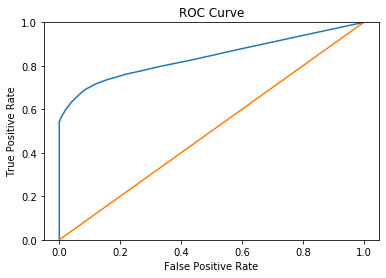

In [16]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(test_y, pred_prob)

# plot
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.ylim([0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [17]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.08607130e-05, 6.25821391e-05, 6.25821391e-05,
       8.34428521e-05, 1.25164278e-04, 1.25164278e-04, 1.46024991e-04,
       1.66885704e-04, 1.66885704e-04, 1.87746417e-04, 2.50328556e-04,
       3.33771408e-04, 3.96353547e-04, 4.79796399e-04, 5.21517825e-04,
       6.25821391e-04, 7.30124956e-04, 8.76149947e-04, 1.08475708e-03,
       1.16819993e-03, 1.35594635e-03, 1.46024991e-03, 1.71057847e-03,
       1.94004631e-03, 2.21123558e-03, 2.39898200e-03, 2.87877840e-03,
       3.17082838e-03, 3.62976407e-03, 4.10956046e-03, 5.06915326e-03,
       5.67411394e-03, 6.44596032e-03, 7.19694599e-03, 8.01051380e-03,
       8.88666375e-03, 1.00757244e-02, 1.10770386e-02, 1.22452385e-02,
       1.36846277e-02, 1.51448777e-02, 1.65842669e-02, 1.86077560e-02,
       2.07981309e-02, 2.26964558e-02, 2.52623235e-02, 2.76195840e-02,
      

In [157]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, pred_prob)

0.8330076652991127

#### maximizing tpr and minimizing fpr

In [160]:
# class0_error = fpr
# class1_error = 1 - tpr

error_cutoff = pd.DataFrame({'cutoff':pd.Series(thresholds),
                               'class0_error':pd.Series(fpr),
                               'class1_error': 1 - pd.Series(tpr)
                                })

error_cutoff['optimal_value'] = 1 - error_cutoff['class0_error'] - error_cutoff['class1_error'] # = tpr - fpr

error_cutoff.sort_values('optimal_value', ascending=False).head(1)

,cutoff,class0_error,class1_error,optimal_value
69,0.13,0.080731,0.315768,0.603501


The best cutoff is 0.13, around tpr=69% (1-0.31) area, where fpr=8%, we can plot it in ROC curve

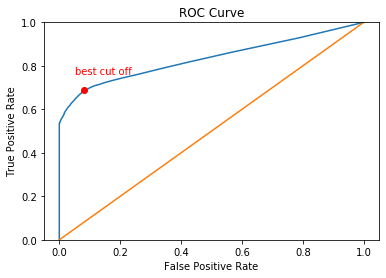

In [170]:
# plot
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.ylim([0, 1.0])
plt.plot(0.08, 0.69, marker='o', color='r')
plt.annotate('best cut off', (0.08, 0.69), (0.05, 0.76), color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Question 3

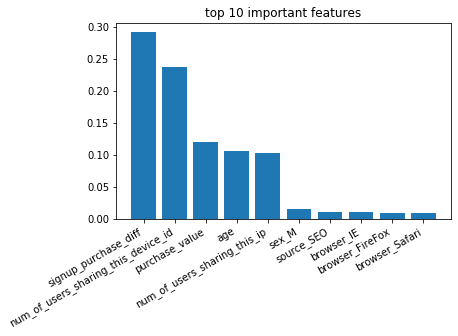

In [199]:
from heapq import nlargest

# get the top 10 important features in rf
features = test_x.columns.to_list()
dic = {}
for i in range(len(features)):
    dic[features[i]] = rf.feature_importances_[i]

features_10 = nlargest(10, dic, key = dic.get) 
importances_10 = []
for f in features_10:
    importances_10.append(dic[f])

# plot
fig, ax = plt.subplots()
ax.bar(features_10, importances_10)
ax.set_title('top 10 important features')
fig.autofmt_xdate()
plt.show()

The the Random Forest Classifier will make the classifications based on features, and these 10 features are the top 10 that will impact the prediction greatly.

### Question 4

False positive would be a very bad user experience, can do harm to the customer's feelings, and thus affect the company's business. So when using the model in production, we need to deal with the possible false positive problems.
1. If predicted fraud probability < X, the user has the normal experience (the high majority of users should fall here)
2. If X <= predicted fraud probability < Z (so the user is at risk, but not too much), you can create an additional verification step, like phone number verifications via a code sent by SMS or asking to log in via social network accounts
3. If predicted fraud probability >= Z (so here is really likely the user is trying to commit a fraud), you can tell the user his activity has been put on hold, send this user info to someone who reviews it manually, and finally either block the user or decide it is not a fraud so the session is resumed